In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [186]:
df = pd.read_csv("HA Data.csv",encoding="cp1252")

In [187]:
df.shape

(66587, 49)

In [21]:
df.duplicated().sum()

17676

In [25]:
#df[df.duplicated()]
#df[df['patient_id']==23752197]
df.drop_duplicates(subset=['patient_id'], keep='first', inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39650 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               39650 non-null  int64  
 1   encounter_id        39650 non-null  int64  
 2   patient_id          39650 non-null  int64  
 3   race                39650 non-null  object 
 4   gender              39650 non-null  object 
 5   age                 39650 non-null  object 
 6   weight              39650 non-null  object 
 7   time_in_hospital    39650 non-null  int64  
 8   medical_specialty   39650 non-null  object 
 9   num_lab_procedures  39650 non-null  int64  
 10  num_procedures      39650 non-null  int64  
 11  num_medications     39650 non-null  int64  
 12  number_outpatient   39650 non-null  int64  
 13  number_emergency    39650 non-null  int64  
 14  number_inpatient    39650 non-null  int64  
 15  diag_1              39650 non-null  object 
 16  diag_2   

In [38]:

df.isnull().sum()

index                     0
encounter_id              0
patient_id                0
race                      0
gender                    0
age                       0
weight                    0
time_in_hospital          0
medical_specialty         0
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                    0
diag_3                    0
diag_4                    0
diag_5                    0
number_diagnoses          0
X1                    37663
X2                    32775
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

## What is the distribution of readmission rates across different age groups?

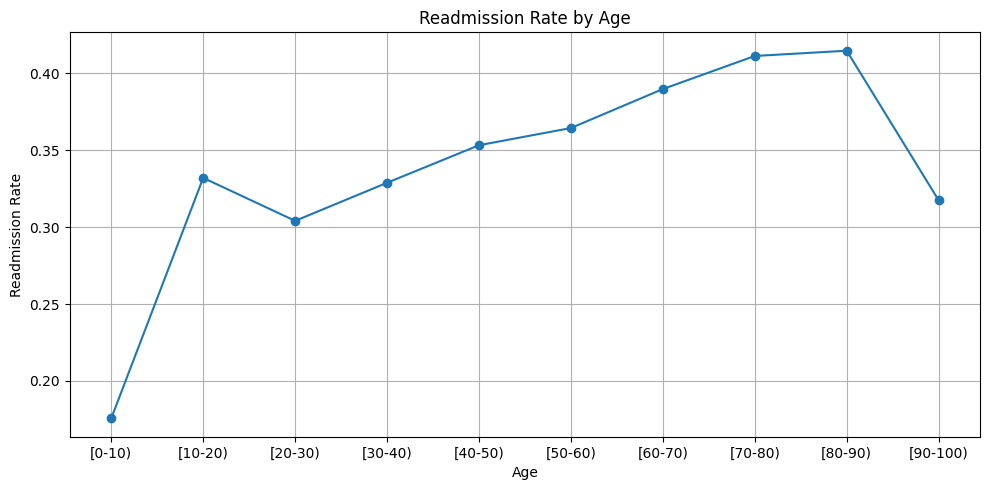

In [50]:
Avg_readmission= df.groupby('age')['readmitted'].mean().reset_index(name='Per_readmitted')

plt.figure(figsize=(10,5))
plt.plot(Avg_readmission['age'], Avg_readmission['Per_readmitted'], marker='o')
plt.xlabel("Age")
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Age")
plt.grid(True)
plt.tight_layout()
plt.show()

Observation:
* Readmission rate is high around age brackets (70-80),(80-90) which is more than 40%.


In [49]:
Avg_readmission

,age,Per_readmitted
0,[0-10),0.175676
1,[10-20),0.332090
2,[20-30),0.304140
3,[30-40),0.328911
4,[40-50),0.353337
5,[50-60),0.364526
6,[60-70),0.389876
7,[70-80),0.411392
8,[80-90),0.414813
9,[90-100),0.317531


## 2. Analyze the average length of hospital stays by medical specialty. Which specialties have the longest and shortest average stays?

In [59]:
df[df['medical_specialty']=='?'].shape

(19239, 49)

In [60]:
39650-19239-->20411

20411

In [ ]:
longest_avg_days=df[df['medical_specialty']!='?'].groupby('medical_specialty')['time_in_hospital'].mean().reset_index().sort_values(by='time_in_hospital', ascending=False).head(5)

shortest_avg_days=df[df['medical_specialty']!='?'].groupby('medical_specialty')['time_in_hospital'].mean().reset_index().sort_values(by='time_in_hospital', ascending=True).head(5)


In [76]:
longest_avg_days

,medical_specialty,time_in_hospital
37,Pediatrics-Pulmonology,10.750000
38,PhysicalMedicineandRehabilitation,9.172185
29,OutreachServices,8.500000
30,Pathology,8.250000
43,Psychiatry-Addictive,8.000000


In [75]:

shortest_avg_days

,medical_specialty,time_in_hospital
33,Pediatrics-EmergencyMedicine,1.000000
2,Anesthesiology-Pediatric,1.777778
1,Anesthesiology,2.000000
50,Speech,2.000000
5,DCPTEAM,2.000000


Observation:
 * Top 5 medical speciality patients spending more than 7 days of avg are Pediatrics-Pulmonology,PhysicalMedicineandRehabilitation,OutreachServices	,Pathology	,Psychiatry-Addictive

 * Top 5 medical speciality patients spending less than 3 days of avg are Pediatrics-EmergencyMedicine,Anesthesiology-Pediatric	,Anesthesiology		,Speech		,DCPTEAM	

## 3. How does the number of emergency visits in the previous year correlate with readmission rates?

In [97]:
patient_df=df.groupby('patient_id').agg(total_emergencies=('number_emergency','sum'),
                                       total_readmission=('readmitted', 'max')).reset_index()

patient_df

,patient_id,total_emergencies,total_readmission
0,135,0,1
1,378,0,0
2,729,0,0
3,774,0,0
4,1152,0,1
...,...,...,...
39645,189179321,1,0
39646,189195422,0,1
39647,189215762,0,1
39648,189257846,0,0


In [96]:
patient_df['total_emergencies'].corr(patient_df['total_readmission'])

0.08947119749885808

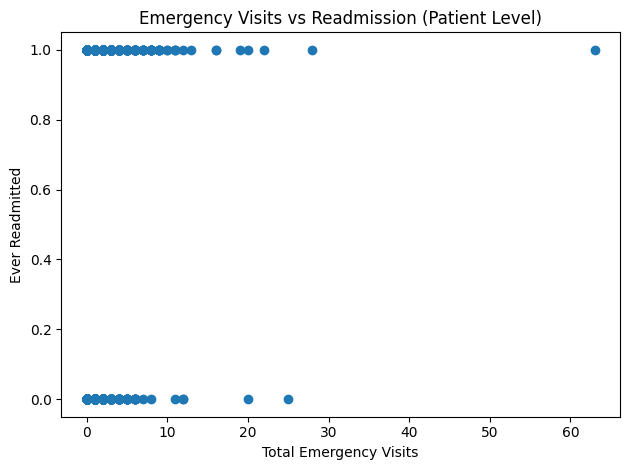

In [81]:

plt.scatter(patient_df['total_emergencies'], patient_df['total_readmission'])
plt.xlabel("Total Emergency Visits")
plt.ylabel("Ever Readmitted")
plt.title("Emergency Visits vs Readmission (Patient Level)")
plt.tight_layout()
plt.show()

Observation:

Since patients had multiple encounters, data was aggregated at patient level. Total emergency visits were summed 
per patient and readmission was represented 
as a binary indicator. Correlation analysis was then performed to evaluate the relationship.

* Patients with very high ER visits (≈20+) are almost all at Y = 1.
* Low emergency visits → mixed outcomes
Below ~10 visits → mixed risk
Above ~15 visits → very high risk   

## 4.What proportion of patients with diabetes were readmitted within 30 days?


In [90]:
tot_diabetic_patients=df[df['diabetesMed']=='Yes'].shape[0]
tot_diabetic_patients_readmitted=df[(df['diabetesMed']=='Yes')&(df['readmitted']==1)].shape[0]
proportion=(tot_diabetic_patients_readmitted/tot_diabetic_patients)*100
proportion

40.28384279475983

## 5.Is there a significant difference in readmission rates between patients with changes in diabetic medication and those without?

In [92]:
readmission_rates_change_in_diabetic_meds=df.groupby('change')['readmitted'].mean().reset_index()

readmission_rates_change_in_diabetic_meds

,change,readmitted
0,Ch,0.407200
1,No,0.367292


## 6. Investigate the relationship between the number of lab procedures performed during the stay and readmission rates.

In [101]:
Lab_procedure_df=df.groupby('patient_id').agg(total_lab_proc=('num_lab_procedures','sum'),
                                       total_readmission=('readmitted', 'max')).reset_index()

Lab_procedure_df['total_lab_proc'].corr(patient_df['total_readmission'])

0.049885588792353004

Observation:
 * A weak positive relationship shows there is no significant association between no. of lab procedures performed and readmission rates.

## 7. How do readmission rates vary by race and gender?


In [105]:
Race_Gender_df=df[df['race']!='?'].groupby(['race','gender'])['readmitted'].mean().reset_index()

Race_Gender_df

,race,gender,readmitted
0,AfricanAmerican,Female,0.377462
1,AfricanAmerican,Male,0.360042
2,Asian,Female,0.351145
3,Asian,Male,0.290076
4,Caucasian,Female,0.401229
5,Caucasian,Male,0.390061
6,Hispanic,Female,0.327473
7,Hispanic,Male,0.342541
8,Other,Female,0.342508
9,Other,Male,0.319079


Observation:

Cacausian & AfricanAmerican showing higher admission rate both for male & female indicating poor healthcare facilities or poor 
health in general due to which either they are not able to recover or fall sick frequently.

## 8. What is the distribution of patients across different weight categories, and how does this relate to readmission rates?

In [51]:
df.shape-39650

(39650, 49)

In [57]:
df[df['weight']=='?'].shape

(38189, 49)

In [58]:
39650-38189 

1461

In [ ]:
we have only 1461 rows data where weight is available. 

In [108]:
df_wt = df[df['weight'] != '?']
patient_weight = df_wt.groupby('patient_id').agg(
    weight=('weight', 'first'),
    ever_readmitted=('readmitted', 'max')
).reset_index()

weight_dist=patient_weight['weight'].value_counts().reset_index()
weight_dist.columns = ['weight_category', 'patient_count']

In [112]:
weight_dist

,weight_category,patient_count
0,[75-100),619
1,[50-75),410
2,[100-125),276
3,[125-150),71
4,[25-50),44
5,[0-25),19
6,[150-175),15
7,[175-200),5
8,>200,2


In [110]:
readmission_by_weight = patient_weight.groupby('weight')['ever_readmitted'].mean().reset_index()
readmission_by_weight.columns = ['weight_category', 'readmission_rate']


<Figure size 800x500 with 0 Axes>

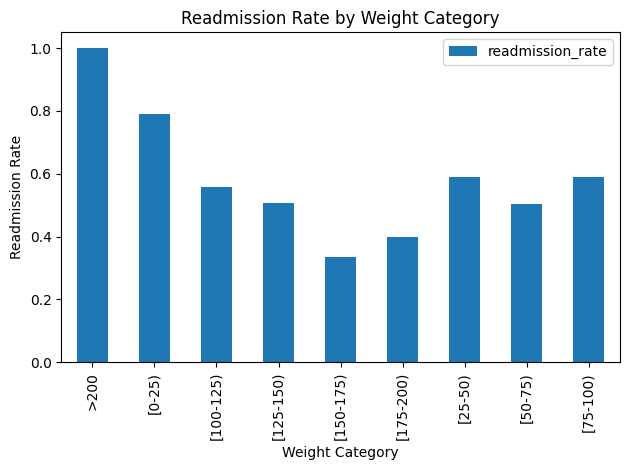

In [114]:
plt.figure(figsize=(8,5))
readmission_by_weight.sort_values('weight_category').plot(
    x='weight_category',
    y='readmission_rate',
    kind='bar'
)
plt.xlabel("Weight Category")
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Weight Category")
plt.tight_layout()
plt.show()


Observation:

Weight categories were analyzed for patient distribution and
associated readmission rates. Results showed that [75-100] weight categories had the highest patient counts, 
There is 100% readmission rate for weight category greater than 200 amd then 0-25 which looks like children or malnutritioned.    
while extreme weight groups demonstrated relatively higher readmission rates, indicating potential clinical risk.

## 9. Evaluate the impact of the number of medications prescribed on the length of hospital stay.

In [115]:
corr = df['num_medications'].corr(df['time_in_hospital'])
corr

0.466419770767519

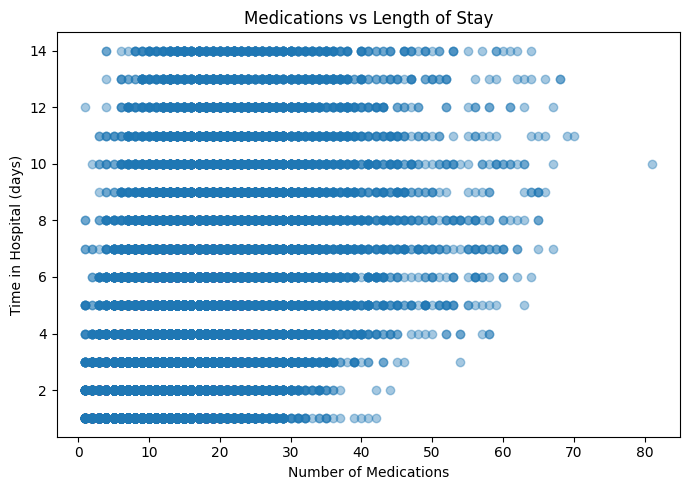

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['num_medications'], df['time_in_hospital'], alpha=0.4)
plt.xlabel("Number of Medications")
plt.ylabel("Time in Hospital (days)")
plt.title("Medications vs Length of Stay")
plt.tight_layout()
plt.show()

In [117]:
from sklearn.linear_model import LinearRegression

X = df[['num_medications']]
y = df['time_in_hospital']

model = LinearRegression()
model.fit(X, y)

model.coef_[0]

0.1676275017204324

In [ ]:
Each additional medication increases hospital stay by ~0.16 days (on average).

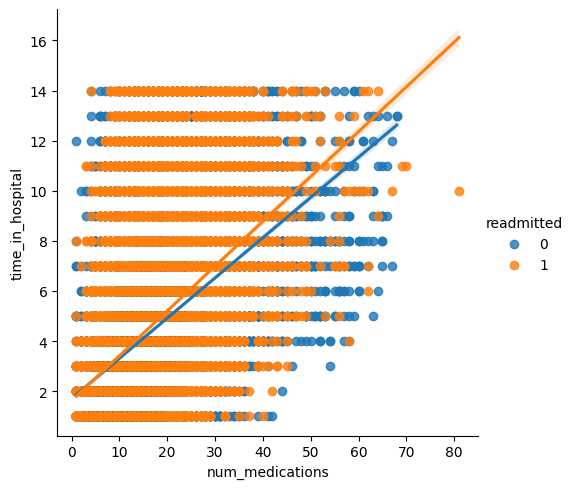

In [118]:
sns.lmplot(x='num_medications',y='time_in_hospital',hue='readmitted',data=df)

Observation:

Scatter plot analysis shows a clear positive relationship between number of medications and hospital 
stay duration. Encounters involving higher medication counts tend to have longer stays.
Additionally, readmitted patients consistently exhibit longer lengths of stay for comparable medication levels,
 indicating greater clinical complexity. This suggests that medication 
volume can serve as an important predictor of both prolonged hospitalization and readmission risk.

## 1. Perform a trend analysis of readmission rates over time. Are there specific months or seasons with higher rates?


In [ ]:
No data related to dates.

## 2. Analyze the effect of comorbid conditions (presence of multiple diagnoses) on the length of hospital stay and readmission rates.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['diag_s','med_s','lab_s']] = scaler.fit_transform(
    df[['number_diagnoses','num_medications','num_lab_procedures']]
)

df['comorbidity_score'] = df[['diag_s','med_s','lab_s']].sum(axis=1)

In [123]:
df['comorbidity_score'].corr(df['readmitted'])

0.09725060169490399

In [181]:
df['comorbidity_score'].corr(df['time_in_hospital'])

0.48418108363214857

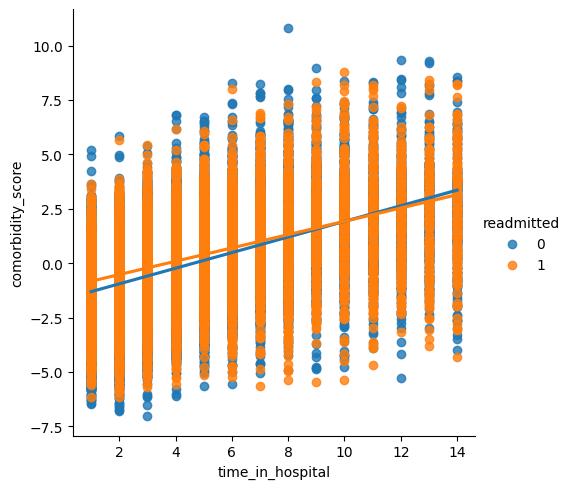

In [182]:
sns.lmplot(x='time_in_hospital',y='comorbidity_score',hue='readmitted',data=df)

Observation:

Scatter analysis shows a positive association between comorbidity score and length of hospital stay,
indicating that patients with higher disease burden tend to require longer hospitalization. 
Readmitted patients exhibit slightly higher comorbidity levels across all stay durations, though substantial overlap exists between groups. 
This suggests that while comorbidity contributes to readmission risk, it alone is insufficient for strong discrimination.

## 3. Investigate the role of discharge dispositions (e.g., discharged to home, transferred to another facility) in readmission rates.

In [ ]:
No data

## 4. Explore the relationship between patient demographics (race, gender, age) and the type of medical interventions received (lab procedures, medications).


In [124]:

#1. By Gender
df.groupby('gender')[['num_lab_procedures','num_medications']].mean().reset_index()




,gender,num_lab_procedures,num_medications
0,Female,43.169130,15.948974
1,Male,43.195936,15.806129
2,Unknown/Invalid,21.500000,14.000000


In [125]:
## 2. By Race
race_df = df[df['race'] != '?']

race_df.groupby('race')[['num_lab_procedures','num_medications']].mean().reset_index()

,race,num_lab_procedures,num_medications
0,AfricanAmerican,44.132796,15.201417
1,Asian,40.862595,12.923664
2,Caucasian,42.953787,16.148090
3,Hispanic,42.106487,13.780906
4,Other,43.669304,15.205696


In [126]:

# by age-group
df.groupby('age')[['num_lab_procedures','num_medications']].mean().reset_index()

,age,num_lab_procedures,num_medications
0,[0-10),40.567568,6.135135
1,[10-20),43.798507,8.026119
2,[20-30),42.673567,11.601911
3,[30-40),42.608240,13.812849
4,[40-50),42.727395,15.241658
5,[50-60),42.495036,16.414015
6,[60-70),42.639933,17.044094
7,[70-80),43.345728,16.304688
8,[80-90),44.450625,15.154831
9,[90-100),45.277281,13.558140


Observation:

This analysis shows that across gender, race, age groups the distribution is even.

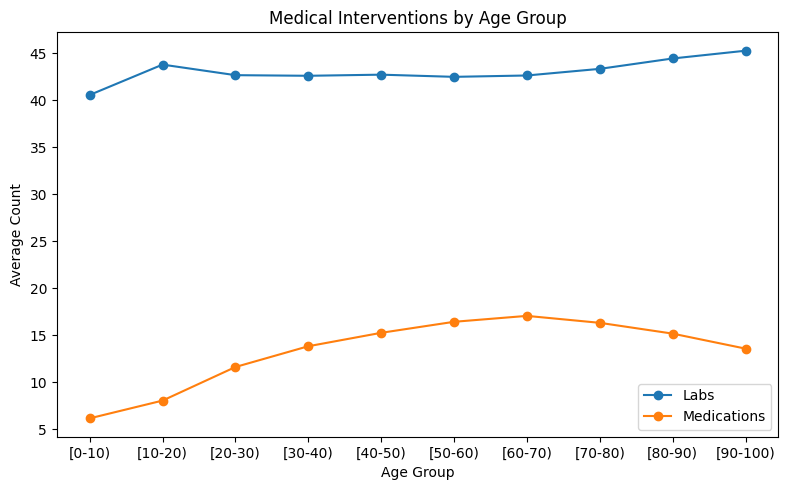

In [127]:
import matplotlib.pyplot as plt

age_stats = df.groupby('age')[['num_lab_procedures','num_medications']].mean()

plt.figure(figsize=(8,5))
plt.plot(age_stats.index, age_stats['num_lab_procedures'], marker='o', label='Labs')
plt.plot(age_stats.index, age_stats['num_medications'], marker='o', label='Medications')
plt.xlabel("Age Group")
plt.ylabel("Average Count")
plt.title("Medical Interventions by Age Group")
plt.legend()
plt.tight_layout()
plt.show()


##  1. Develop a predictive model to identify patients at high risk of readmission based on their initial hospital visit data.


In [134]:
df_sorted = df.sort_values(['patient_id','encounter_id'])

# First encounter features
first_visit = df_sorted.groupby('patient_id').first().reset_index()

# Target: ever readmitted
target = df.groupby('patient_id')['readmitted'].max().reset_index()
target.columns = ['patient_id','ever_readmitted']

model_df = first_visit.merge(target, on='patient_id')

In [136]:
model_df.columns


Index(['patient_id', 'index', 'encounter_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted', 'comorbidity_score', 'diag_s', 'med_s',
       'lab_s', 'ever_readmitted'],
      dtype='object')

In [159]:
features = [
    'age','gender','race',
    'time_in_hospital',
    'comorbidity_score'
    'num_procedures',
    'number_emergency',
    'number_inpatient'
]

numeric_features = [
    'time_in_hospital',
    'comorbidity_score',
    'num_procedures',
    'number_emergency',
    'number_inpatient'
]

categorical_features = [
    'age','gender','race'
]


In [165]:
X = model_df[numeric_features + categorical_features]
y = model_df['ever_readmitted']

In [170]:

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


In [171]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [172]:
pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

In [173]:
X

,time_in_hospital,comorbidity_score,num_procedures,number_emergency,number_inpatient,age,gender,race
0,3,-2.030682,1,0,1,[50-60),Female,Caucasian
1,2,-2.497100,1,0,0,[50-60),Female,Caucasian
2,4,2.965742,2,0,0,[80-90),Female,Caucasian
3,3,1.487512,0,0,0,[80-90),Female,Caucasian
4,8,-3.363271,1,0,1,[60-70),Female,AfricanAmerican
...,...,...,...,...,...,...,...,...
39645,1,0.203931,2,1,0,[70-80),Male,Caucasian
39646,5,4.085762,3,0,0,[70-80),Female,Asian
39647,5,2.512860,1,0,0,[40-50),Male,Caucasian
39648,4,1.530081,1,0,1,[60-70),Male,Asian


In [176]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# =========================================================
# 6. TRAIN MODEL
# =========================================================

pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_in_hospital',
                                                   'comorbidity_score',
                                                   'num_procedures',
                                                   'number_emergency',
                                                   'number_inpatient']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['age', 'gender', 'race'])])),
                ('clf', LogisticRegression(max_iter=1000))])

ROC-AUC: 0.6359596592105445


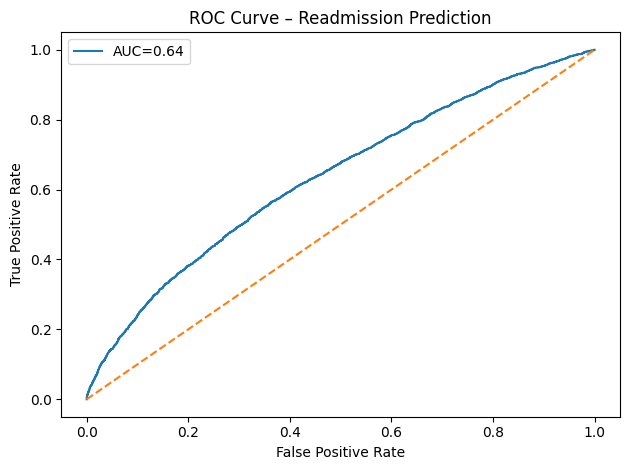

In [177]:
y_prob = pipe.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Readmission Prediction")
plt.legend()
plt.tight_layout()
plt.show()

In [178]:
model_df['risk_score'] = pipe.predict_proba(X)[:,1]

high_risk_patients = model_df[model_df['risk_score'] > 0.6]

high_risk_patients[['patient_id','risk_score']].head()

,patient_id,risk_score
48,30735,0.843146
55,33354,0.806860
81,45144,0.712280
107,67284,0.620529
115,70110,0.854841
